<a href="https://colab.research.google.com/github/rabulhasan/data_analytics_2/blob/main/Python/Unit%203/Mini%20Project/COVID19_DATA_ANALYSIS_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [48]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [49]:
df.shape

(28724, 5)

In [50]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [51]:
ny_df = df[df['state']=='New York']

In [52]:
ny_df.head() #fips is Federal Information Processing Standard state code


,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [53]:
ny_df.shape

(524, 5)

In [54]:
ny_df.tail()

,date,state,fips,cases,deaths
28482,2021-08-02,New York,36,2153243,53281
28537,2021-08-03,New York,36,2156305,53294
28592,2021-08-04,New York,36,2159139,53301
28647,2021-08-05,New York,36,2162581,53315
28702,2021-08-06,New York,36,2166341,53318


In [55]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [56]:
first_ny_death.tail()

,date,state,fips,cases,deaths
28482,2021-08-02,New York,36,2153243,53281
28537,2021-08-03,New York,36,2156305,53294
28592,2021-08-04,New York,36,2159139,53301
28647,2021-08-05,New York,36,2162581,53315
28702,2021-08-06,New York,36,2166341,53318


In [57]:
#total number of cases
ny_df['cases'].max()

2166341

In [58]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

527429255

Finding new covid 19 cases on daily basis (new cases added everyday)

In [59]:
#new cases for NY
#type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  #print(newcase_count)

In [60]:
#new deaths for NY
#type(ny_df['deaths'])

newdeaths = []
previuos_death = 0
for index, row in ny_df.iterrows():
  current_death = row['deaths']
  newdeath_count = current_death - previuos_death
  previuos_death = current_death
  newdeaths.append(newdeath_count)
  #print(newdeath_count)

In [61]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
ny_df['new_death'] = newdeaths

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases,new_death
246,2020-03-01,New York,36,1,0,1,0
261,2020-03-02,New York,36,1,0,0,0
276,2020-03-03,New York,36,2,0,1,0
293,2020-03-04,New York,36,11,0,9,0
313,2020-03-05,New York,36,22,0,11,0
338,2020-03-06,New York,36,44,0,22,0
369,2020-03-07,New York,36,89,0,45,0
404,2020-03-08,New York,36,106,0,17,0
440,2020-03-09,New York,36,142,0,36,0
478,2020-03-10,New York,36,173,0,31,0


In [64]:
ny_df.tail(10) #new cases until yesterday

,date,state,fips,cases,deaths,new_cases,new_death
28207,2021-07-28,New York,36,2140050,53248,1800,12
28262,2021-07-29,New York,36,2142694,53250,2644,2
28317,2021-07-30,New York,36,2145309,53257,2615,7
28372,2021-07-31,New York,36,2148445,53266,3136,9
28427,2021-08-01,New York,36,2151035,53274,2590,8
28482,2021-08-02,New York,36,2153243,53281,2208,7
28537,2021-08-03,New York,36,2156305,53294,3062,13
28592,2021-08-04,New York,36,2159139,53301,2834,7
28647,2021-08-05,New York,36,2162581,53315,3442,14
28702,2021-08-06,New York,36,2166341,53318,3760,3


In [65]:
ny_df['new_cases'].sum()

2166341

In [66]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']
ny_new_deaths = ny_df['new_death']

In [67]:
type(ny_new_cases)

pandas.core.series.Series

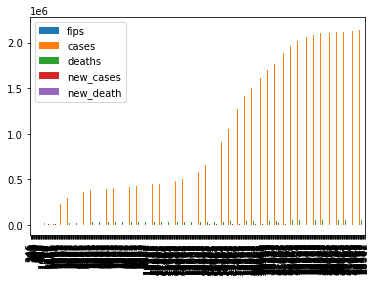

In [68]:
ny_df.plot(kind='bar')

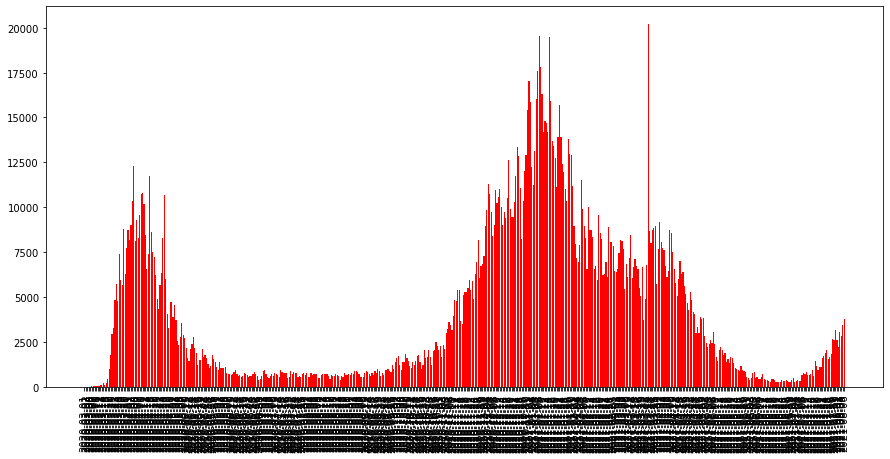

In [69]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()
#The peak of first wave for new cases was in April'2020. 
#The peak of 2nd wave was in around mid-Jan'2021. The peak of the third wave was April'2021. 
#Now it seems like there are another wave is going. When it would be in peak for the 4th wave? 

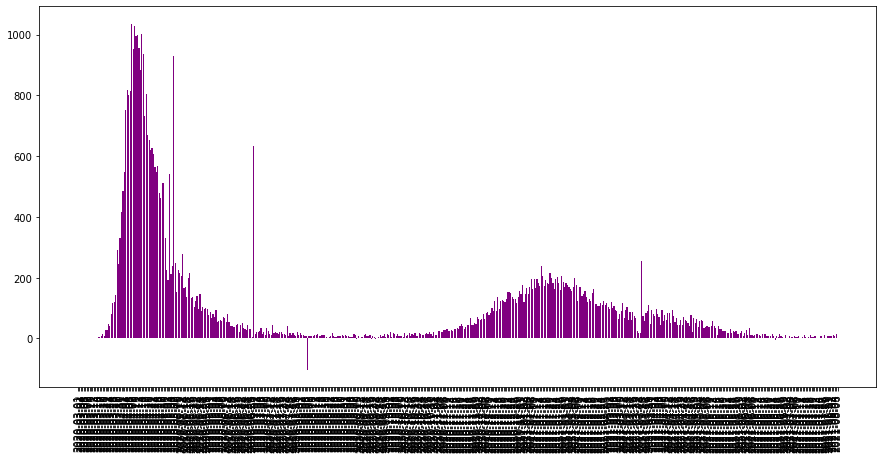

In [70]:
#NY new deaths count
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_deaths, color='purple')
plt.xticks(rotation=90)
plt.show()
#In addition, I make another plot for the deaths count. 
#Interestingly I found that NY state deaths rate is decreasing if I compare it with the new cases. Why the death rate is not increasing?

# Task4: Understand NY covid 19 data in last 30 days

In [71]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]
ny_new_deaths_30 = ny_df['new_death'][-31:-1]

In [72]:
#ny_dates_30

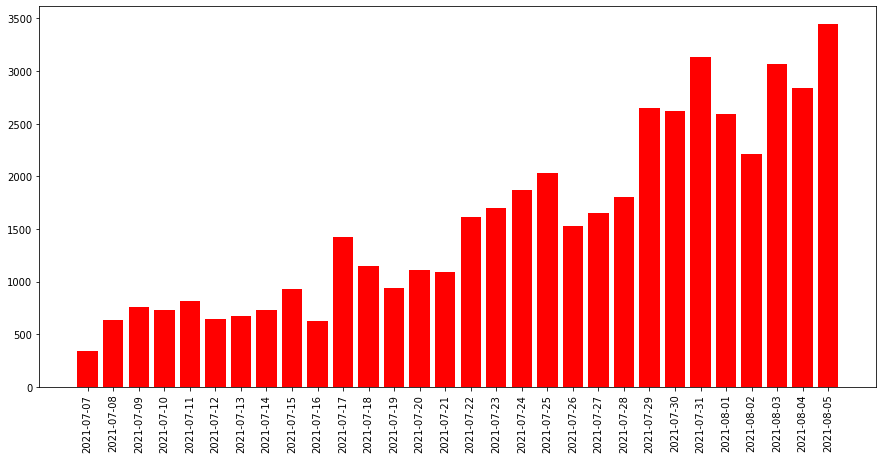

In [73]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

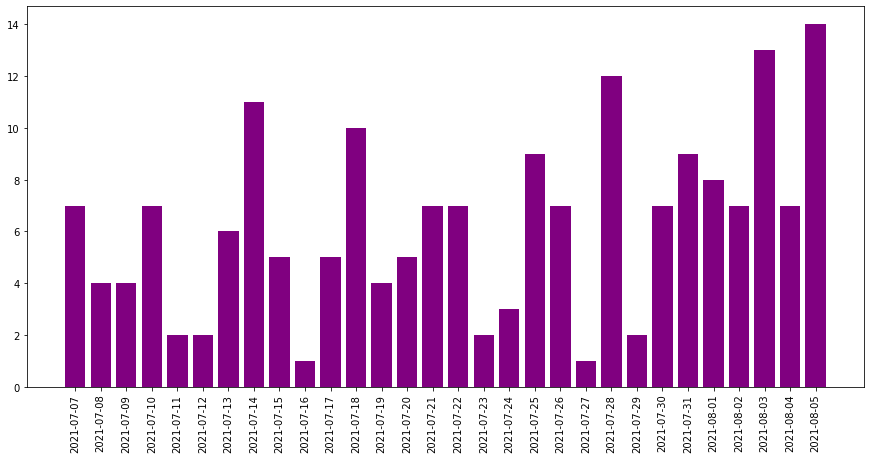

In [74]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_deaths_30, color='purple')
plt.xticks(rotation=90)
plt.show()

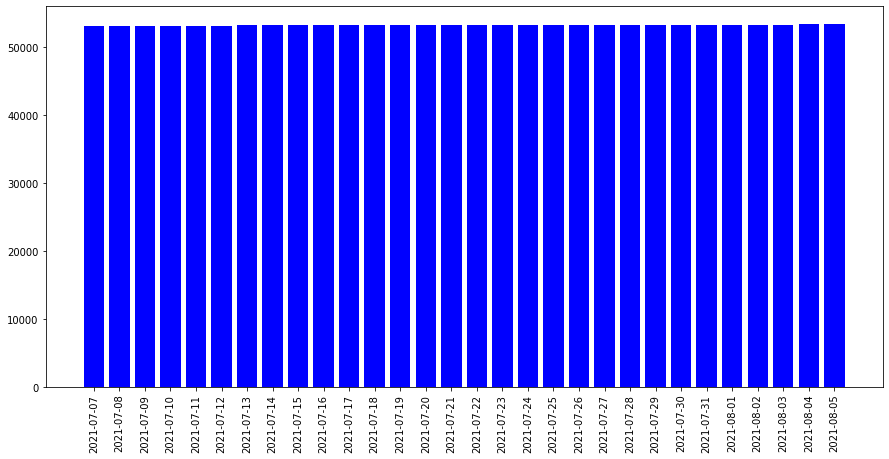

In [75]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

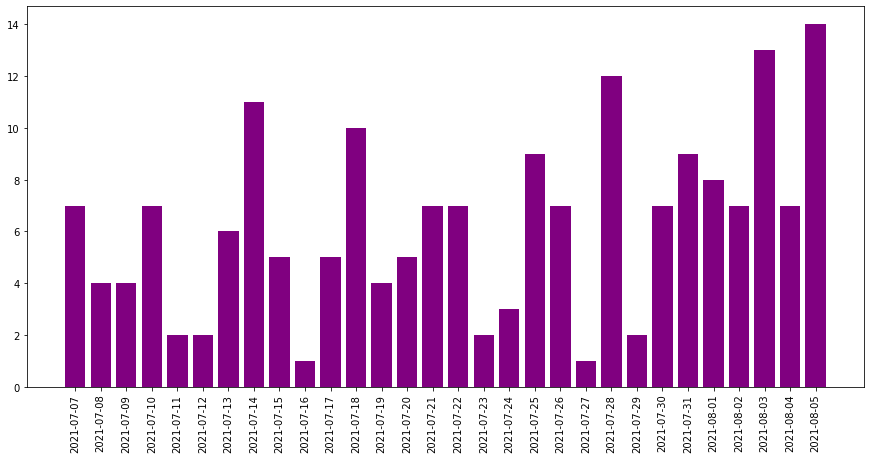

In [76]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_deaths_30, color='purple')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [77]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

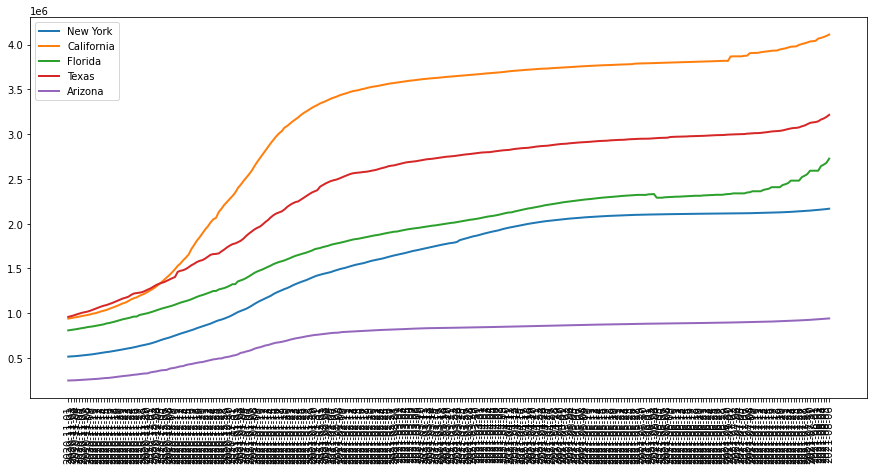

In [78]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


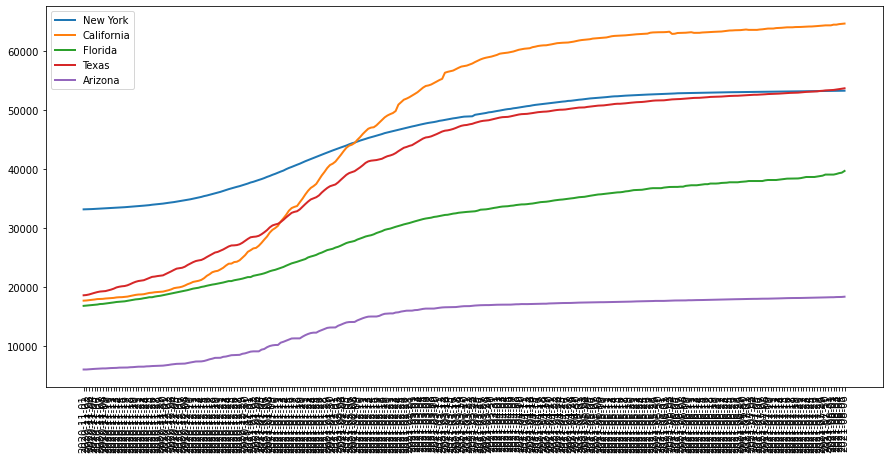

In [79]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['deaths'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()

# Conclusion

##Below are the conclusions:




### Conclusion 1
 The peak of first wave for new cases was in April'2020 in the NY. The peak of 2nd wave was in around mid-Jan'2021. The peak of the third wave was April 2021. Now it seems like there are another wave is going on. When it would be in peak for the 4th wave? However, it's seems like it's related with the weather. In every season changes the wave reach their peak point. In addition, I make another plot for the deaths count. Interestingly I found that NY state deaths rate is decreasing if I compare it with the new cases. Why the death rate is not increasing? Is this because of vaccination rate?
  ### Conclusion 2
   To compare between NY and California, the new cases rate is tremendously increasing in California than NY. While NY deaths rate is dicreasing, California deaths rate keeps maintain the ratio with the new cases.
